   # VIOLÊNCIA DOMÉSTICA NO ESTADO DE PERNAMBUCO

### IMPORTANDO AS BIBLIOTECAS

In [5]:
pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

## LENDO O ARQUIVO EXCEL

In [6]:
df = pd.read_excel(r'C:\Users\gabri\Desktop\temporal-analysis-of-domestic-violence-in-the-state-of-pernambuco\Data\MICRODADOS_DE_VIOLÊNCIA_DOMÉSTICA_JAN_2015_A_AGO_2022.xlsx')

In [9]:
df

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS
0,AFOGADOS DA INGAZEIRA,SERTÃO,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,6) 35-64,1
1,AFRANIO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,5) 30-34,1
2,AFRANIO,SERTÃO,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,4) 25-29,1
3,AGUAS BELAS,AGRESTE,ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...,2015-01-01,2015,FEMININO,2) 12-17,1
4,ALAGOINHA,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,6) 35-64,1
...,...,...,...,...,...,...,...,...
253698,SAO JOSE DO BELMONTE,SERTÃO,MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,(vazio),1
253699,SAO JOSE DO EGITO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,3) 18-24,1
253700,SURUBIM,AGRESTE,PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA...,2022-08-31,2022,FEMININO,6) 35-64,1
253701,VERDEJANTE,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,6) 35-64,1


### Criando filtros

In [18]:
df['MUNICÍPIO DO FATO']

0         AFOGADOS DA INGAZEIRA
1                       AFRANIO
2                       AFRANIO
3                   AGUAS BELAS
4                     ALAGOINHA
                  ...          
253698     SAO JOSE DO BELMONTE
253699        SAO JOSE DO EGITO
253700                  SURUBIM
253701               VERDEJANTE
253702               VERDEJANTE
Name: MUNICÍPIO DO FATO, Length: 253703, dtype: object

In [20]:
df_caruaru = df[ df['MUNICÍPIO DO FATO'] == 'CARUARU' ]
df_caruaru

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS
21,CARUARU,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,6) 35-64,1
22,CARUARU,AGRESTE,ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...,2015-01-01,2015,FEMININO,3) 18-24,1
23,CARUARU,AGRESTE,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,3) 18-24,1
24,CARUARU,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,3) 18-24,1
25,CARUARU,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,5) 30-34,1
...,...,...,...,...,...,...,...,...
253537,CARUARU,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-30,2022,FEMININO,3) 18-24,1
253538,CARUARU,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-30,2022,FEMININO,5) 30-34,1
253635,CARUARU,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,3) 18-24,1
253636,CARUARU,AGRESTE,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,3) 18-24,1


In [21]:
df_caruaru['IDADE SENASP'].value_counts()

6) 35-64         4813
3) 18-24         2722
5) 30-34         2563
4) 25-29         2377
2) 12-17          594
7) 65 OU MAIS     378
1) 00-11          287
(vazio)            68
Name: IDADE SENASP, dtype: int64

In [22]:
df_caruaru['ANO'].value_counts()

2018    2119
2019    1973
2020    1843
2017    1829
2021    1754
2016    1573
2015    1531
2022    1180
Name: ANO, dtype: int64

In [39]:
df[ (df['SEXO'] == 'FEMININO') ]['IDADE SENASP'].value_counts()

6) 35-64         86982
3) 18-24         46158
4) 25-29         39575
5) 30-34         39403
2) 12-17         10410
7) 65 OU MAIS     8328
1) 00-11          3972
(vazio)           1982
Name: IDADE SENASP, dtype: int64

In [43]:
df[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '3) 18-24') ]['NATUREZA'].value_counts()

AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    16907
LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR            14308
INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    5430
VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              2727
OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              2027
DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                       2007
DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  1010
PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      972
ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     191
CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     150
CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      125
MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  97
ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR        91
PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  88
CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              28
Name: NATUREZA, dtype: in

#### VERIFICAÇÃO DOS TIPOS COLUNÁRES

In [10]:
df.dtypes

MUNICÍPIO DO FATO              object
REGIAO GEOGRÁFICA              object
NATUREZA                       object
DATA DO FATO           datetime64[ns]
ANO                             int64
SEXO                           object
IDADE SENASP                   object
TOTAL DE ENVOLVIDOS             int64
dtype: object

## AALISE DOS VALORES COLUNARES

In [15]:
df['IDADE SENASP'].value_counts()

6) 35-64         92515
3) 18-24         48331
4) 25-29         41295
5) 30-34         41077
2) 12-17         11919
7) 65 OU MAIS     9693
1) 00-11          5959
(vazio)           2914
Name: IDADE SENASP, dtype: int64

Necessário fazer ajustes na strig

In [23]:
df['MUNICÍPIO DO FATO'].value_counts()

RECIFE                     42592
JABOATAO DOS GUARARAPES    15161
CARUARU                    13802
OLINDA                     13428
PETROLINA                  12257
                           ...  
GRANITO                      101
QUIXABA                       99
INGAZEIRA                     97
MARAIAL                       91
ITACURUBA                     82
Name: MUNICÍPIO DO FATO, Length: 185, dtype: int64

String já pré-processada, não precisa de ajustes

In [39]:
df['NATUREZA'].value_counts()

AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    92689
LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR            63960
INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                   33233
OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             12914
DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                      12490
VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             12487
PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     8966
DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  6724
MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                3281
ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      2792
CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    1397
CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     1019
ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     975
PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                 586
CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             190
Name: NATUREZA, dtype: in

In [40]:
df['SEXO'].value_counts()

FEMININO         236810
MASCULINO         16113
DESCONHECIDO        610
NAO INFORMADO       170
Name: SEXO, dtype: int64

#### Verificando existencia de dados faltantes

In [45]:
df.isnull().count()

MUNICÍPIO DO FATO      253703
REGIAO GEOGRÁFICA      253703
NATUREZA               253703
DATA DO FATO           253703
ANO                    253703
SEXO                   253703
IDADE SENASP           253703
TOTAL DE ENVOLVIDOS    253703
dtype: int64

In [47]:
df['IDADE SENASP'][0][3:]

'35-64'

Não há dados faltantes

crianção de uma função para ajustar os dados do sexo

In [60]:
def ajuste_sexo (sexo):
    if sexo == 'DESCONHECIDO' or sexo == 'NAO INFORMADO':
        sexo = 'DESCONHECIDO/NAO INFORMADO'
    else:
        sexo = sexo

    return sexo

df['SEXO'] = df['SEXO'].apply(ajuste_sexo)

criação da idade para ajustar a idade

In [48]:
def ajuste_idades(idade):
        if idade == '(vazio)':
                idade = '35-64'
        else:
                idade = idade[3:]
                
        return idade

df['IDADE SENASP'] = df['IDADE SENASP'].apply(ajuste_idades)


In [62]:
df['SEXO'].value_counts()

FEMININO                      236810
MASCULINO                      16113
DESCONHECIDO/NAO INFORMADO       780
Name: SEXO, dtype: int64

In [63]:
df

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS,MÊS DO FATO
0,AFOGADOS DA INGAZEIRA,SERTÃO,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,35-64,1,1
1,AFRANIO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,30-34,1,1
2,AFRANIO,SERTÃO,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,25-29,1,1
3,AGUAS BELAS,AGRESTE,ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...,2015-01-01,2015,FEMININO,12-17,1,1
4,ALAGOINHA,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,35-64,1,1
...,...,...,...,...,...,...,...,...,...
253698,SAO JOSE DO BELMONTE,SERTÃO,MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,35-64,1,8
253699,SAO JOSE DO EGITO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,18-24,1,8
253700,SURUBIM,AGRESTE,PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA...,2022-08-31,2022,FEMININO,35-64,1,8
253701,VERDEJANTE,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,35-64,1,8


Criando uma nova coluna com a informação do mês de ocorrência do fato

In [50]:
df['MÊS DO FATO'] = df['DATA DO FATO'].dt.month

In [65]:
df['REGIAO GEOGRÁFICA'].value_counts()

REGIÃO METROPOLITANA    67286
AGRESTE                 59386
SERTÃO                  54002
CAPITAL                 42592
ZONA DA MATA            30437
Name: REGIAO GEOGRÁFICA, dtype: int64

Verificando a idade em cada um dos meses

In [56]:
df[df['MÊS DO FATO'] == 1]['IDADE SENASP'].value_counts()

35-64         8952
18-24         4176
30-34         3827
25-29         3677
65 OU MAIS     932
12-17          894
00-11          471
Name: IDADE SENASP, dtype: int64

In [57]:
df[df['MÊS DO FATO'] == 2]['IDADE SENASP'].value_counts()

35-64         7798
18-24         3853
30-34         3455
25-29         3410
12-17          872
65 OU MAIS     833
00-11          482
Name: IDADE SENASP, dtype: int64

In [59]:
df[df['MÊS DO FATO'] == 3]['IDADE SENASP'].value_counts()

35-64         8627
18-24         4284
30-34         3849
25-29         3754
12-17         1022
65 OU MAIS     925
00-11          530
Name: IDADE SENASP, dtype: int64

#### CRIAÇÃO DE UMA CLASSE PARAR MODULARIZAR O PRÉ-PROCESSAMENTO

In [87]:
class ajustes:
    def __init__(self): 
        self.df = df
    def run(self)
        self.df['IDADE SENASP'].apply(self.ajuste_idades)
        self.criar_feature_mes()
    
    def ajuste_idades(idade):
        idade = idade[3:]
        return idade
    
    def criar_feature_mes(self):
        self.df['MÊS DO FATO'] = self.df['DATA DO FATO'].dt.month

## Criação de um dataset para analise temporal

In [63]:
df_temp = df['DATA DO FATO'].value_counts().rename_axis('data').to_frame('N_casos')

In [67]:
df_tempo.sort_index(inplace = True)

In [69]:
df_temp

,N_casos
data,
2015-01-01,102
2015-01-02,53
2015-01-03,87
2015-01-04,107
2015-01-05,88
...,...
2022-08-27,94
2022-08-28,174
2022-08-29,110


<AxesSubplot:xlabel='data'>

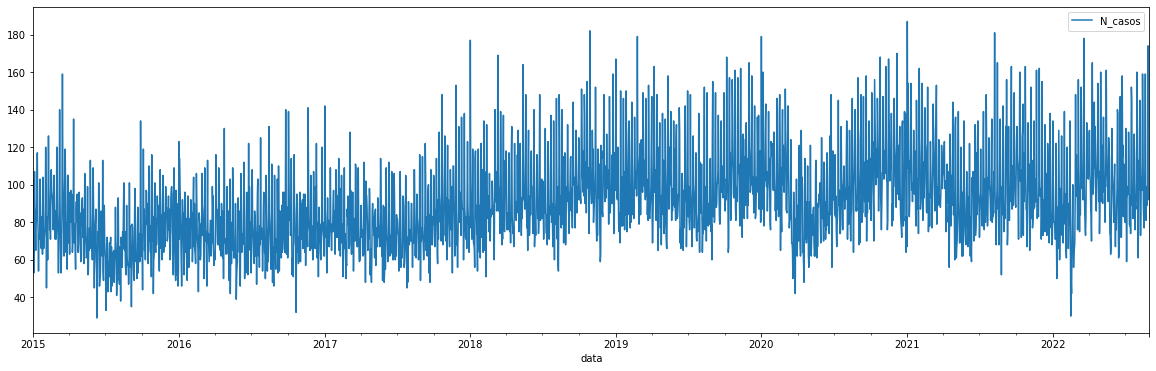

In [70]:
df_temp.plot(figsize=(20,6))

<AxesSubplot:>

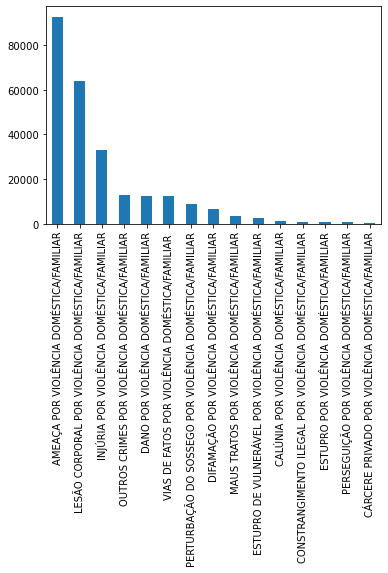

In [80]:
df['NATUREZA'].value_counts().plot.bar()

<AxesSubplot:>

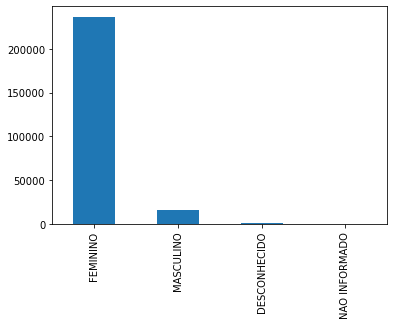

In [89]:
df['SEXO'].value_counts().plot.bar()